In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def density_water(T):
    '''Density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''

    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)


def logistic(x, L, k, x0, b):
    '''Logistic function to fit the data'''
    return L / (1 + np.exp((x0-x) / k)) + b

a = 90.4 # side length of top surface
layer_height = 1 # water layer height

volume_per_layer = []
area_per_layer = [a**2]
side_area_per_layer = []
for _ in range(1, 17):
        
    b = a - 4 # the slope is 1:2 thus giving 1 m length at each side
    layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
    side_area = 1/2 * (a + b) * 4
    volume_per_layer.append(layer_volume)
    area_per_layer.append(b**2)
    side_area_per_layer.append(side_area)
    a = b

volume_per_layer = pd.Series(volume_per_layer).round(0)
volume_per_layer = volume_per_layer[::-1].reset_index(drop=True)

area_per_layer = pd.Series(area_per_layer)
area_per_layer = area_per_layer[::-1].reset_index(drop=True)

side_area_per_layer = pd.Series(side_area_per_layer).round(0)
side_area_per_layer = side_area_per_layer[::-1].reset_index(drop=True)

df = pd.read_csv('../data/processed/dronninglund/water_sensors.csv', parse_dates=True, index_col=0) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,t
2014-05-01 00:00:00+01:00,34.000000,34.725000,36.191667,38.208333,40.533333,41.833333,42.550000,43.25,43.9,44.700000,46.250000,48.250000,56.416667,65.891667,75.458333,76.458333,0.0
2014-05-01 01:00:00+01:00,33.991667,34.725000,36.183333,38.183333,40.516667,41.833333,42.541667,43.25,43.9,44.691667,46.216667,48.183333,56.250000,65.800000,75.408333,76.408333,1.0
2014-05-01 02:00:00+01:00,33.975000,34.691667,36.191667,38.175000,40.508333,41.850000,42.550000,43.25,43.9,44.658333,46.141667,48.133333,56.125000,65.666667,75.283333,76.391667,2.0
2014-05-01 03:00:00+01:00,33.958333,34.666667,36.191667,38.216667,40.500000,41.850000,42.550000,43.25,43.9,44.683333,46.075000,48.091667,55.966667,65.550000,75.225000,76.350000,3.0
2014-05-01 04:00:00+01:00,33.966667,34.666667,36.166667,38.158333,40.491667,41.808333,42.550000,43.25,43.9,44.650000,46.000000,48.041667,55.791667,65.400000,75.091667,76.400000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58485.0
2020-12-31 22:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58486.0
2020-12-31 23:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58487.0
2021-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58488.0


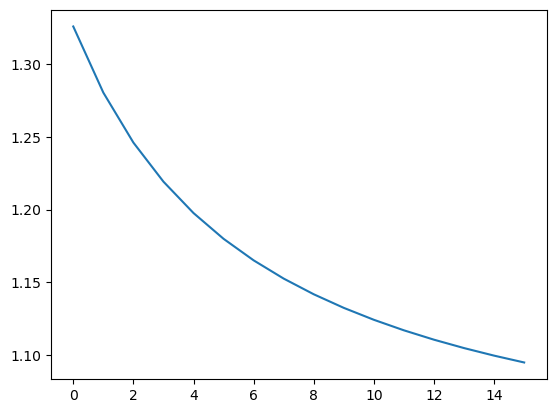

In [2]:

# plt.plot( 1/ volume_per_layer.values)
plt.plot( area_per_layer.values[1:] /area_per_layer.values[:-1])
# plt.plot((area_per_layer[1:].values / area_per_layer.iloc[:-1].values))


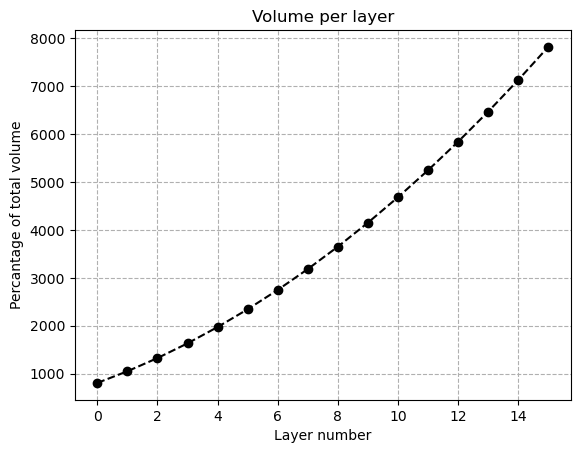

In [3]:
volume_per_layer.plot(linestyle = '--', marker = 'o', color = 'black', label = 'Volume per layer') 
plt.xlabel('Layer number')
plt.ylabel('Percantage of total volume')
plt.title('Volume per layer')
plt.grid(linestyle = '--');

In [4]:
volume_per_layer.mean()

3751.8125

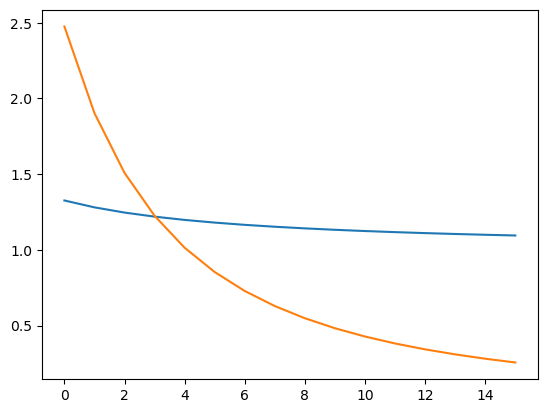

In [5]:
plt.plot(area_per_layer[1:].values / area_per_layer[:-1].values)
plt.plot(1/volume_per_layer.values * 2000)

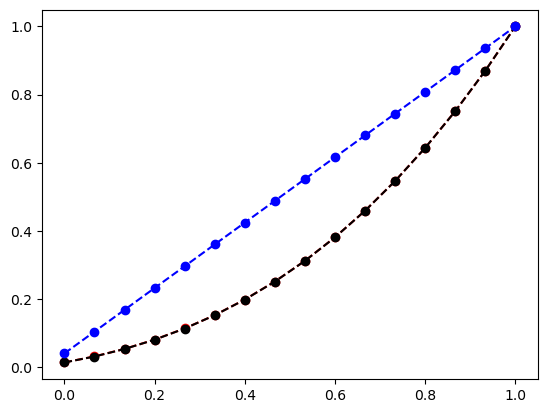

In [6]:
t = np.linspace(0,1,16)
l = logistic(t, 60, k = 0.001, x0 = 0, b= 20)
q = density_water(l) * volume_per_layer
plt.plot(t, (q / q.sum()).cumsum(), linestyle = '--', marker = 'o', color = 'red', label = 'Logistic function')
plt.plot(t, (volume_per_layer / volume_per_layer.sum()).cumsum(), linestyle = '--', marker = 'o', color = 'black', label = 'Volume per layer')
plt.plot(t, (l / l.sum()).cumsum(), linestyle = '--', marker = 'o', color = 'blue', label = 'Density')

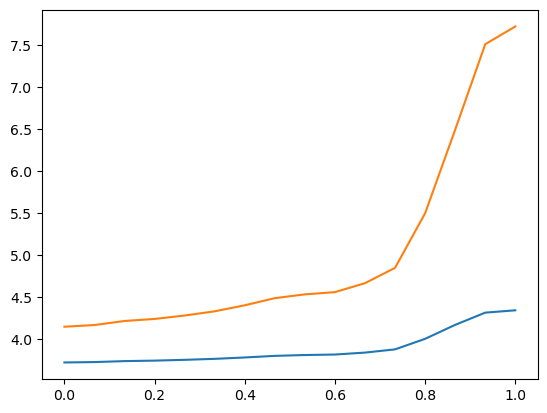

In [7]:
np.log(df.iloc[100, 0:16]).sum(), df.iloc[100, 0:16].sum()
plt.plot(t, np.log(df.iloc[100, 0:16]))
plt.plot(t, df.iloc[100, 0:16] / 10)

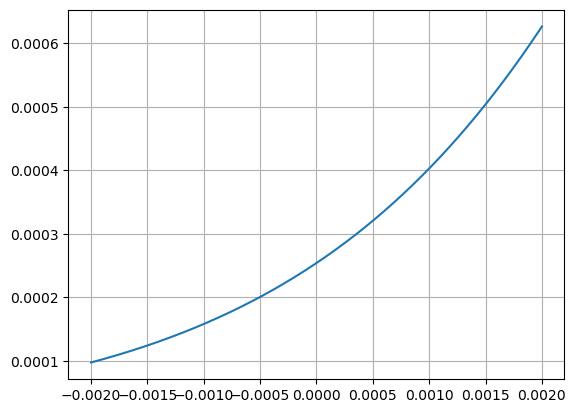

In [8]:
import matplotlib.pyplot as plt
import numpy as np

c = 500
f = lambda x: np.log(1 + np.exp(c*x-2))/c

x = np.linspace(-0.002, 0.002, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.grid()
# ax.plot(volume_per_layer[:-1].values / volume_per_layer[1:].values)

# RC Model


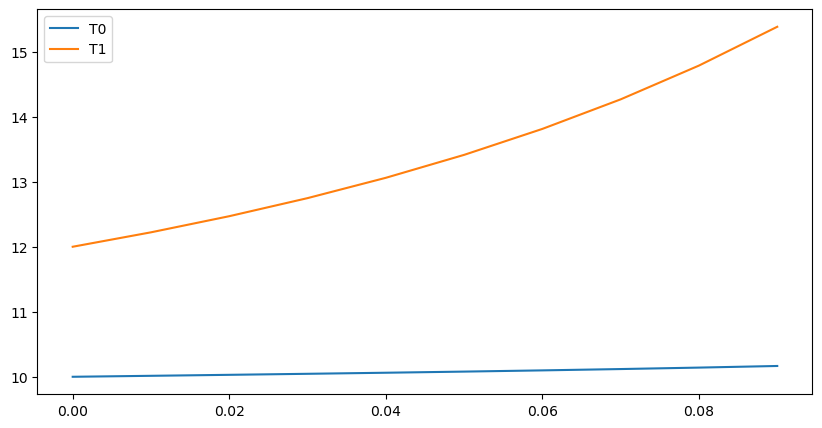

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, log

C = 100
K = 50
Tin = 50
F = 10


def rk4(f, x0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        k1 = dt * f(t[i], x[i])
        k2 = dt * f(t[i] + 0.5*dt, x[i] + 0.5*k1)
        k3 = dt * f(t[i] + 0.5*dt, x[i] + 0.5*k2)
        k4 = dt * f(t[i] + dt, x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x

def f(t, x):
    return np.array(
            [1/C * (K*(x[1]-x[0])+(Tin-x[0])*F*(1/(1+exp(-(x[0]-x[1]))))),
             1/C * ((K*(1-x[0]-x[1]))*(x[0]-x[1]))]
    )



t, x = rk4(f, np.array([10, 12]), 0, 0.1, 0.01)
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(t, x[:,0], label = 'T0')
ax.plot(t, x[:,1], label = 'T1')
ax.legend()

array([0.24419428, 0.46396913, 0.6617665 , 0.83978413, 1.        ])

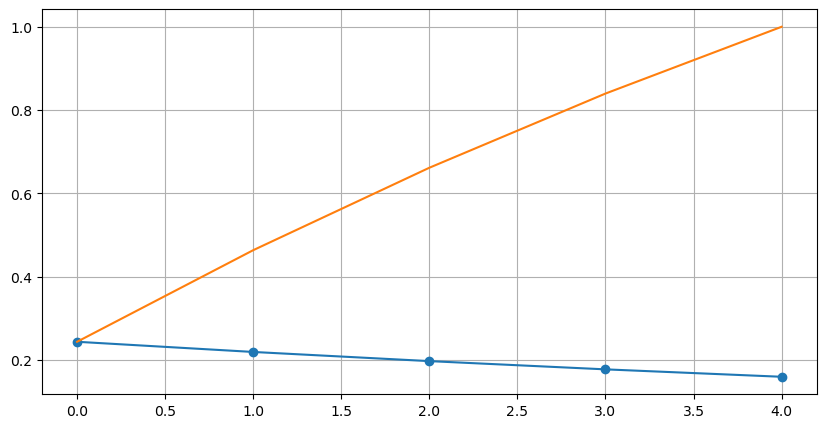

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
l = 0.9
f = lambda x: l**x*(1-l)/(1-l**5)
x = np.arange(0, 5)
ax.plot(x, f(x), marker ='o')
ax.plot(x, np.cumsum(f(x)))
ax.grid()
np.cumsum(f(x))

# Waves


,Unnamed: 0,X,X0,X1,X2,X3,X4,X5,X6,X7,...,b7x6,b7x7,b7x8,b7x9,b7x10,b7x11,b7x12,b7x13,b7x14,b7x15
0,8041,2015-04-01 00:00:00+01:00,15.100000,15.450000,15.800000,15.850000,15.700000,15.800000,16.000000,16.041667,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
1,8042,2015-04-01 01:00:00+01:00,14.950000,15.433333,15.800000,15.850000,15.700000,15.800000,16.000000,16.050000,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
2,8043,2015-04-01 02:00:00+01:00,14.766667,15.408333,15.800000,15.850000,15.700000,15.783333,16.016667,16.050000,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
3,8044,2015-04-01 03:00:00+01:00,14.633333,15.425000,15.800000,15.850000,15.716667,15.750000,16.041667,16.050000,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
4,8045,2015-04-01 04:00:00+01:00,14.533333,15.383333,15.800000,15.850000,15.800000,15.750000,16.033333,16.050000,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,10964,2015-07-31 19:00:00+01:00,45.466667,45.366667,46.050000,47.691667,49.200000,51.725000,53.991667,56.091667,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
2924,10965,2015-07-31 20:00:00+01:00,45.450000,45.316667,45.975000,47.566667,49.166667,51.733333,53.958333,56.091667,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
2925,10966,2015-07-31 21:00:00+01:00,45.400000,45.316667,45.958333,47.491667,49.133333,51.675000,53.933333,56.016667,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1
2926,10967,2015-07-31 22:00:00+01:00,45.400000,45.300000,45.933333,47.416667,49.050000,51.625000,53.900000,55.991667,...,0,0,0,0,0,0,0.008,0.10163,0.39437,1


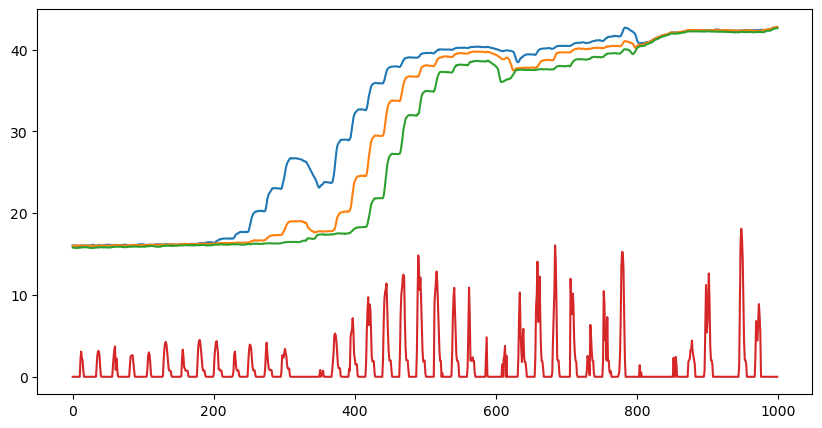

In [11]:
import numpy as np
from numpy import log, exp, tanh
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data.csv')


fig, ax = plt.subplots(figsize = (10,5))
temp = df.iloc[:1000]
ax.plot(temp.X7)
ax.plot(temp.X6)
ax.plot(temp.X5)
ax.plot(temp.FbotOut/1000*((temp.X6-1)/temp.X5*temp.X6))

df


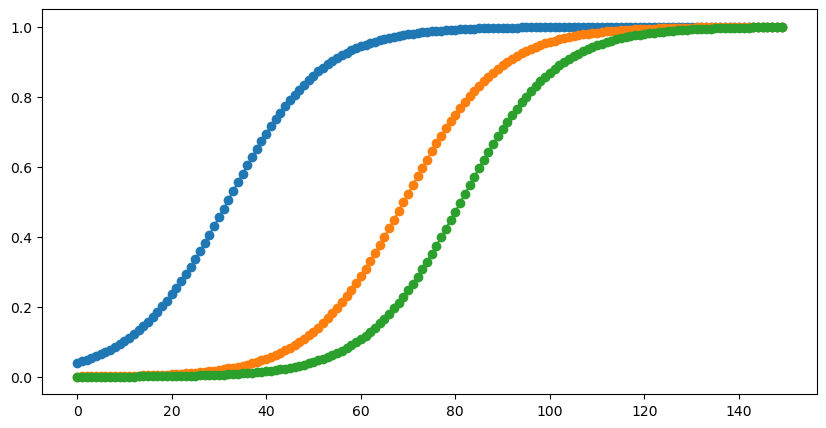

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, log



def rk4(f, x0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        k1 = dt * f(t[i], x[i])
        k2 = dt * f(t[i] + 0.5*dt, x[i] + 0.5*k1)
        k3 = dt * f(t[i] + 0.5*dt, x[i] + 0.5*k2)
        k4 = dt * f(t[i] + dt, x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x

def f(t, x):
    return x*(1-x)




t, x = rk4(f, [0.04,0.001,0.0003], 0, 15, 0.1)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x, marker = 'o');

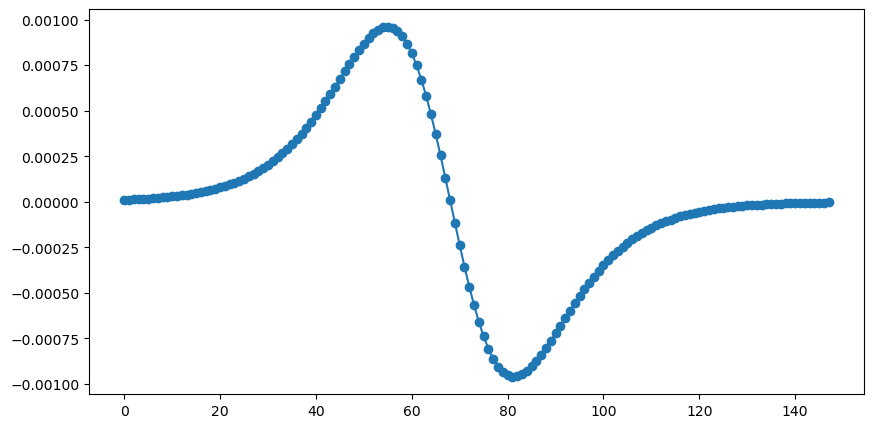

In [13]:
x1, x2, x3 = x[:,0], x[:,1], x[:,2]
dx1, dx2, dx3 = x1[1:] - x1[:-1], x2[1:] - x2[:-1], x3[1:] - x3[:-1]
dx12, dx23 = x1 - x2, x2 - x3
fig, ax = plt.subplots(figsize = (10,5))
idx = np.argsort(dx12[:-1])
ax.plot(x2[:-2]-2*x2[1:-1]+x2[2:], marker = 'o')


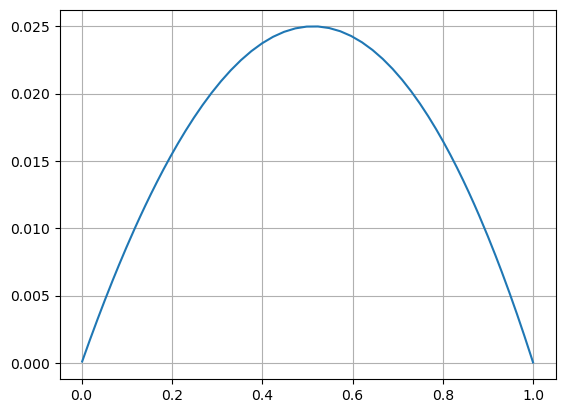

In [14]:
plt.plot(x2[1:],x2[1:]-x2[:-1])
plt.grid()


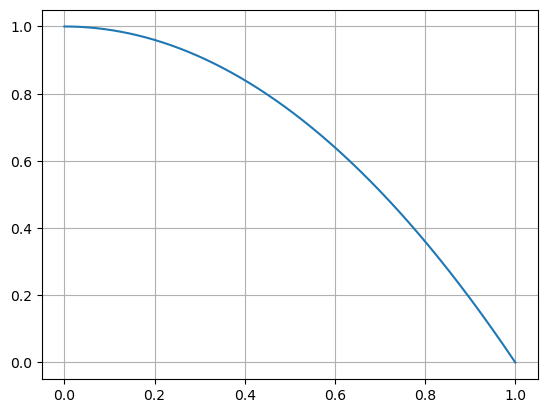

In [15]:
x = np.linspace(0, 1, 1000)
y = 1 - x
f = lambda x, y: (x)*(y)+y


plt.plot(x, f(x, y))
plt.grid()


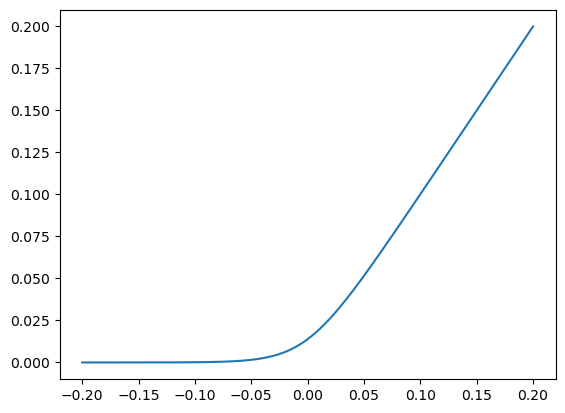

In [24]:
x = np.linspace(-0.2,0.2,1000)
c = 50
y = log(1+exp(c*x))/c
plt.plot(x, y)
